In [73]:
import os
from src import utils 
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.patches import Rectangle
from skimage import io
from src.utils import load_yaml
import seaborn as sns

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

def translate_yaml(yaml_path):
    yaml_data = utils.load_yaml(yaml_path)

    dataset_config = yaml_data.pop('dataset_config')
    model_config = yaml_data.pop('model_config')
    optim_config = yaml_data.pop('optim_config')
    other_config = yaml_data.pop('other_config')

    dataset_config.pop('data_paths')

    yaml_data['data_augmentation'] = ''.join([e[0] for e in yaml_data['data_augmentation']])
    yaml_data['input_data_shape'] = '_'.join([str(e) for e in yaml_data['input_data_shape']])
    yaml_data['output_data_shape'] = '_'.join([str(e) for e in yaml_data['output_data_shape']])
    yaml_data['test_metric_indexes'] = '_'.join([str(e) for e in yaml_data['test_metric_indexes']])

    yaml_data.update(dataset_config)
    yaml_data.update(model_config)
    # yaml_data.update(optim_config)
    yaml_data.update(other_config)

    return yaml_data

def load_test_results(test_metrics_path):
    metric_dict= {}
    
    for metric in os.listdir(test_metrics_path):
        metric_name = metric[:-4]
        metric_data = np.load(os.path.join(test_metrics_path, metric))
        metric_dict[f'{metric_name}_mean'] = np.mean(metric_data) if len(metric_data) > 0 else 0
        metric_dict[f'{metric_name}_std'] = np.std(metric_data) if len(metric_data) > 0 else 0
    return metric_dict
        

def sorted_imgs_by_epoch(filename_list):
    epochs = [int(e[:-4]) for e in filename_list]
    return [f'{e}.png' for e in sorted(epochs)]

In [14]:
results_path = os.path.abspath('results')

if not os.path.exists(results_path):
    raise ValueError('There is no results folder.')

dataset_list = os.listdir(results_path)
dataset_path_list = [os.path.join(results_path, e) for e in os.listdir(results_path)]

all_results = {}

for dataset, dataset_path in zip(dataset_list, dataset_path_list):
    model_list = os.listdir(dataset_path)
    model_path_list = [os.path.join(dataset_path, e) for e in os.listdir(dataset_path)]
    for model, model_path in zip(model_list, model_path_list):
        additfolder_list = os.listdir(model_path)
        additfolder_path_list = [os.path.join(model_path, e) for e in os.listdir(model_path)]
        cont = 0
        for additfolder, additfolder_path in zip(additfolder_list, additfolder_path_list):
            config_list = os.listdir(additfolder_path)
            config_path_list = [os.path.join(additfolder_path, e) for e in os.listdir(additfolder_path)]
            for config, config_path in zip(config_list, config_path_list):
                yaml_path = os.path.join(config_path, 'train_configuration.yaml')
                test_metrics_path = os.path.join(config_path, 'test_metrics')
                
                if os.path.exists(yaml_path) and os.path.exists(test_metrics_path):
                    yaml_data = translate_yaml(yaml_path)
                    yaml_data.update(load_test_results(test_metrics_path))

                    yaml_data.update({'config_path': config_path})

                    all_results[f'{model}_{dataset}_{cont}'] = yaml_data

                    cont += 1


In [17]:
df = pd.DataFrame(all_results).T
df.head()

actual_scale_factor batch_size data_augmentation  \
rcan_MT_0                   2          4               rhv   
rcan_MT_1                   2          4               rhv   
rcan_MT_2                   2          4               rhv   
rcan_MT_3                   2          4               rhv   
rcan_MT_4                   2          4               rhv   

          datagen_sampling_pdf dataset_name discriminator_learning_rate  \
rcan_MT_0                    0           MT                       0.001   
rcan_MT_1                    0           MT                      0.0001   
rcan_MT_2                    0           MT                      0.0005   
rcan_MT_3                    0           MT                       0.001   
rcan_MT_4                    0           MT                       0.001   

          discriminator_lr_scheduler discriminator_optimizer input_data_shape  \
rcan_MT_0                   OneCycle                    Adam      315_64_64_1   
rcan_MT_1                   OneCycle                    Adam      315_64_64_1   
rcan_MT_2                   OneCycle                    Adam      315_64_64_1   
rcan_MT_3                   OneCycle                    Adam      315_64_64_1   
rcan_MT_4                   OneCycle                    Adam      315_64_64_1   

          learning_rate model number_of_epochs optimizer output_data_shape  \
rcan_MT_0         0.001  rcan               50      Adam     315_128_128_1   
rcan_MT_1        0.0001  rcan               50      Adam     315_128_128_1   
rcan_MT_2        0.0005  rcan               10      Adam     315_128_128_1   
rcan_MT_3         0.001  rcan              100      Adam     315_128_128_1   
rcan_MT_4         0.001  rcan               10      Adam     315_128_128_1   

          scheduler seed          test_metric_indexes validation_split  \
rcan_MT_0  OneCycle  666  69_7_36_75_74_30_12_42_87_0              0.1   
rcan_MT_1  OneCycle  666  69_7_36_75_74_30_12_42_87_0              0.1   
rcan_MT_2  OneCycle  666  69_7_36_75_74_30_12_42_87_0              0.1   
rcan_MT_3  OneCycle  666  69_7_36_75_74_30_12_42_87_0              0.1   
rcan_MT_4  OneCycle  666  69_7_36_75_74_30_12_42_87_0              0.1   

               crappifier patch_size_x patch_size_y scale num_filters  \
rcan_MT_0  downsampleonly           64           64  None          16   
rcan_MT_1  downsampleonly           64           64  None          16   
rcan_MT_2  downsampleonly           64           64  None          16   
rcan_MT_3  downsampleonly           64           64  None          16   
rcan_MT_4  downsampleonly           64           64  None          16   

          percp_coef positional_encoding positional_encoding_channels  \
rcan_MT_0       1000               False                           64   
rcan_MT_1       1000               False                           64   
rcan_MT_2       1000               False                           64   
rcan_MT_3       1000               False                           64   
rcan_MT_4       1000               False                           64   

          alex_mean  alex_std ssim_mean  ssim_std  vgg_mean   vgg_std  \
rcan_MT_0  0.162581  0.056357  0.660991  0.081252  0.291208  0.054628   
rcan_MT_1  0.281193  0.053794  0.488354   0.06546  0.495756  0.062922   
rcan_MT_2  0.285137  0.057027  0.488052  0.071675  0.475055  0.065545   
rcan_MT_3  0.142245  0.046097  0.709455  0.076329  0.231855  0.052133   
rcan_MT_4  0.275153  0.057735  0.525021  0.078293  0.395135  0.063614   

           psnr_mean  psnr_std  mse_mean   mse_std  \
rcan_MT_0  26.691004  2.554265   0.00258  0.001711   
rcan_MT_1  22.477591  1.746323   0.00612  0.002444   
rcan_MT_2  22.552636   2.42936  0.006478  0.003602   
rcan_MT_3  26.898925  2.721299  0.002492  0.001629   
rcan_MT_4  23.798002  2.496687  0.004926  0.002933   

                                                 config_path num_res_blocks  \
rcan_MT_0  /home/ocb/Documents/MicroscoPy/results/MT/rcan...    

In [18]:
# All possible configurations (not showing columns with single repeated value)
visualize_df = df.copy()
nunique = visualize_df.nunique()
cols_to_drop = nunique[nunique == 1].index
visualize_df.drop(cols_to_drop, axis=1)

actual_scale_factor       dataset_name  \
rcan_MT_0                                   2                 MT   
rcan_MT_1                                   2                 MT   
rcan_MT_2                                   2                 MT   
rcan_MT_3                                   2                 MT   
rcan_MT_4                                   2                 MT   
rcan_MT_5                                   2                 MT   
rcan_MT_6                                   2                 MT   
rcan_MT_7                                   2                 MT   
rcan_MT_8                                   2                 MT   
rcan_MT_9                                   2                 MT   
rcan_MT_10                                  2                 MT   
rcan_MT_11                                  2                 MT   
wdsr_MT_0                                   2                 MT   
wdsr_MT_1                                   2                 MT   
wdsr_MT_2                                   2                 MT   
wdsr_MT_3                                   2                 MT   
wdsr_MT_4                                   2                 MT   
wdsr_MT_5                                   2                 MT   
wdsr_MT_6                                   2                 MT   
wdsr_MT_7                                   2                 MT   
wdsr_MT_8                                   2                 MT   
wdsr_MT_9                                   2                 MT   
wdsr_MT_10                                  2                 MT   
wdsr_MT_11                                  2                 MT   
unet_MT_0                                   2                 MT   
unet_MT_1                                   2                 MT   
unet_MT_2                                   2                 MT   
unet_MT_3                                   2                 MT   
unet_MT_4                                   2                 MT   
unet_MT_5                                   2                 MT   
unet_MT_6                                   2                 MT   
unet_MT_7                                   2                 MT   
unet_MT_8                                   2                 MT   
unet_MT_9                                   2                 MT   
unet_MT_10                                  2                 MT   
unet_MT_11                                  2                 MT   
rcan_F-actin_0                              2            F-actin   
rcan_F-actin_1                              2            F-actin   
rcan_F-actin_2                              2            F-actin   
rcan_F-actin_3                              2            F-actin   
rcan_F-actin_4                              2            F-actin   
rcan_F-actin_5                              2            F-actin   
rcan_F-actin_6                              2            F-actin   
rcan_F-actin_7                              2            F-actin   
rcan_F-actin_8                              2            F-actin   
rcan_F-actin_9                              2            F-actin   
rcan_F-actin_10                             2            F-actin   
rcan_F-actin_11                             2            F-actin   
wdsr_F-actin_0                              2            F-actin   
wdsr_F-actin_1                              2            F-actin   
wdsr_F-actin_2                              2            F-actin   
wdsr_F-actin_3                              2            F-actin   
wdsr_F-actin_4                              2            F-actin   
wdsr_F-actin_5                              2            F-actin   
wdsr_F-actin_6                              2            F-actin   
wdsr_F-actin_7                              2            F-actin   
wdsr_F-actin_8                              2            F-actin   
wdsr_F-actin_9                              2            F-actin   
wdsr_F-actin_1

# Analyze a single configuration

In [25]:
select_config = 'rcan_MT_0'
config_df = df.loc[select_config]

train_metrics_path = os.path.join(config_df['config_path'], 'train_metrics')
train_images_path = os.path.join(config_df['config_path'], 'training_images')
test_metrics_path = os.path.join(config_df['config_path'], 'test_metrics')
predicted_images_path = os.path.join(config_df['config_path'], 'predicted_images')

print(config_df)

actual_scale_factor                                                             2
batch_size                                                                      4
data_augmentation                                                             rhv
datagen_sampling_pdf                                                            0
dataset_name                                                                   MT
discriminator_learning_rate                                                 0.001
discriminator_lr_scheduler                                               OneCycle
discriminator_optimizer                                                      Adam
input_data_shape                                                      315_64_64_1
learning_rate                                                               0.001
model                                                                        rcan
number_of_epochs                                                               50
optimizer       

### Visualization of the training information

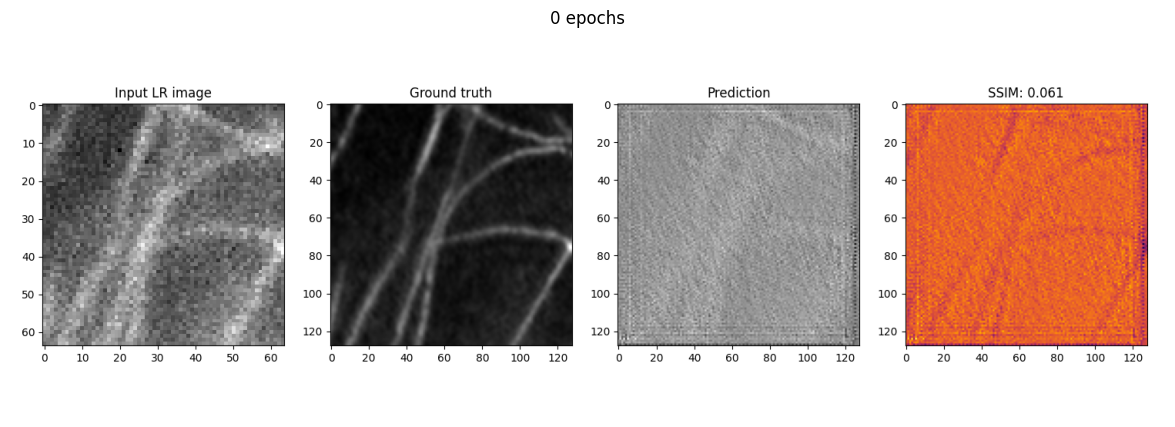

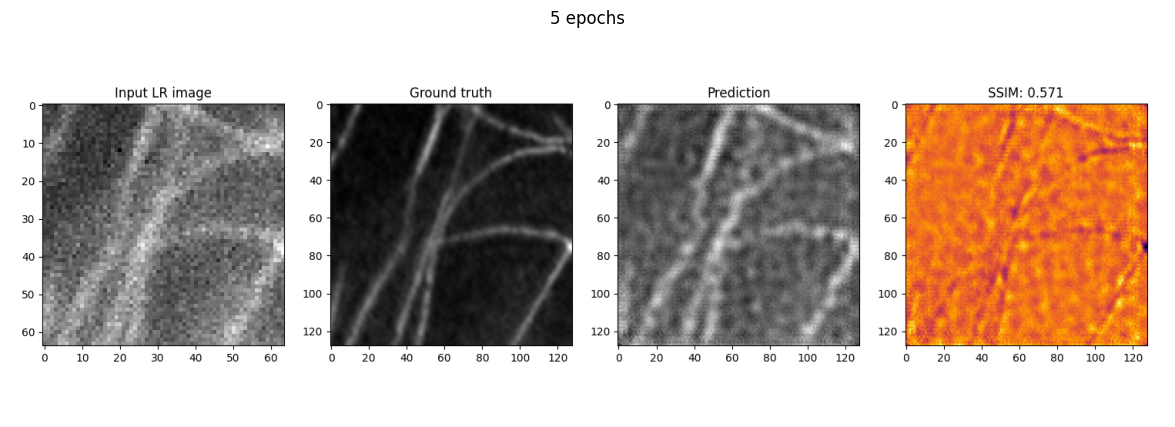

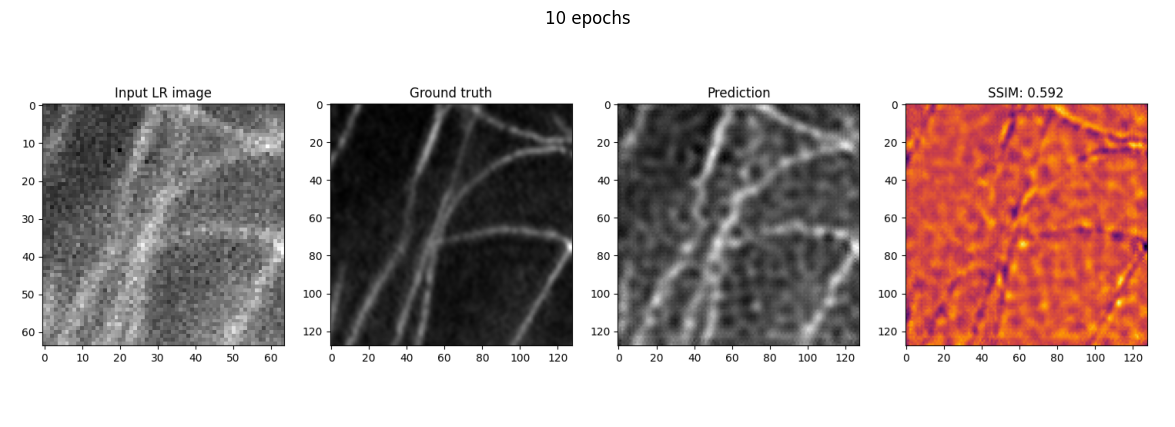

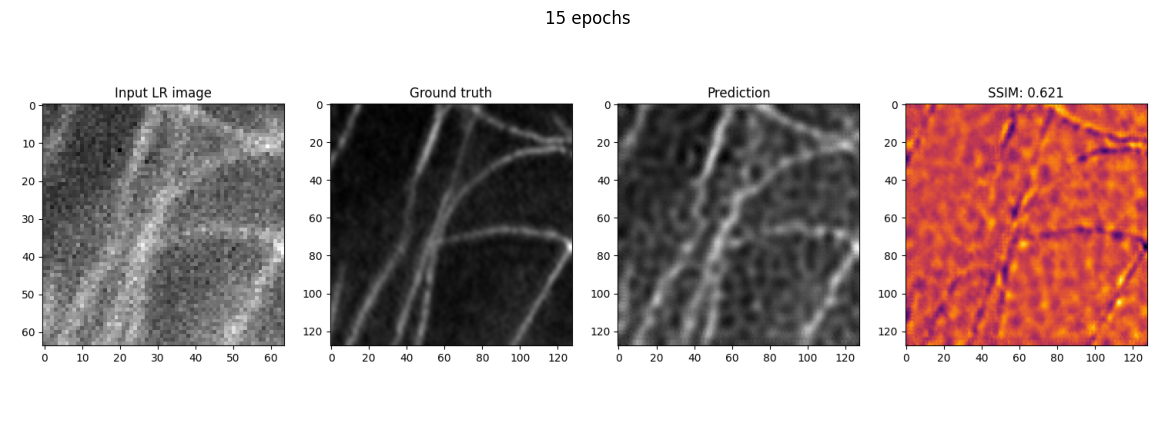

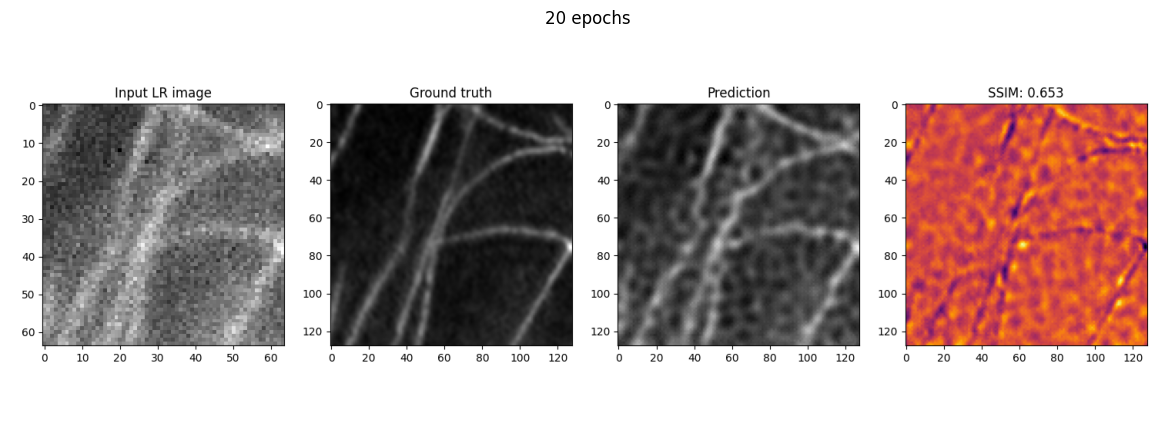

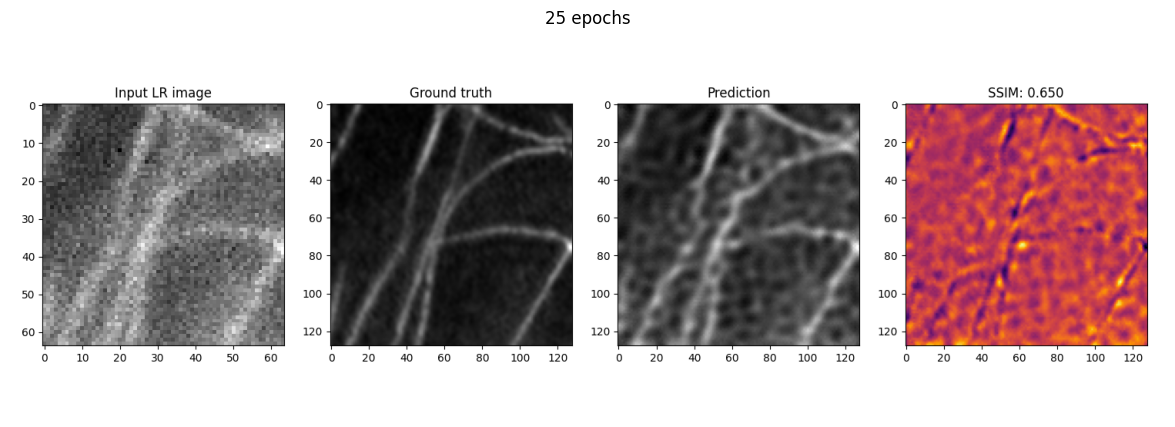

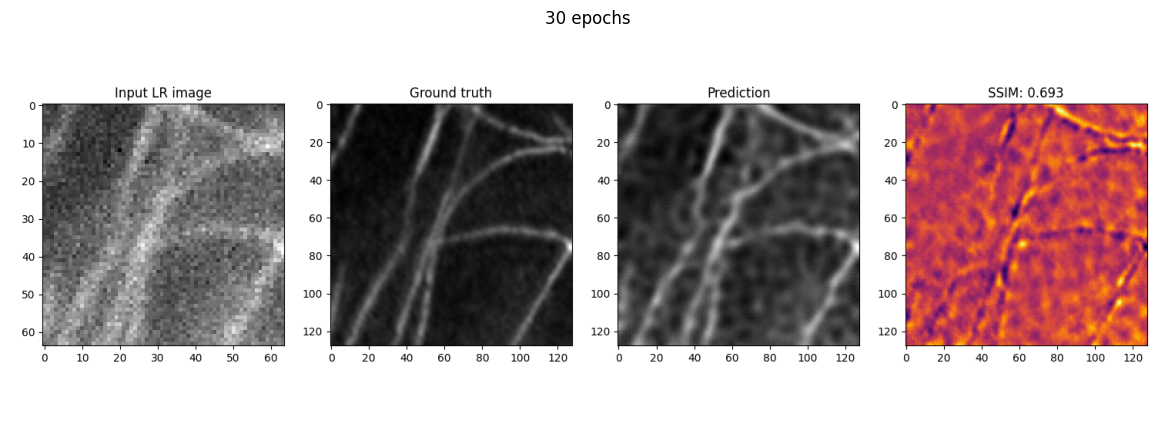

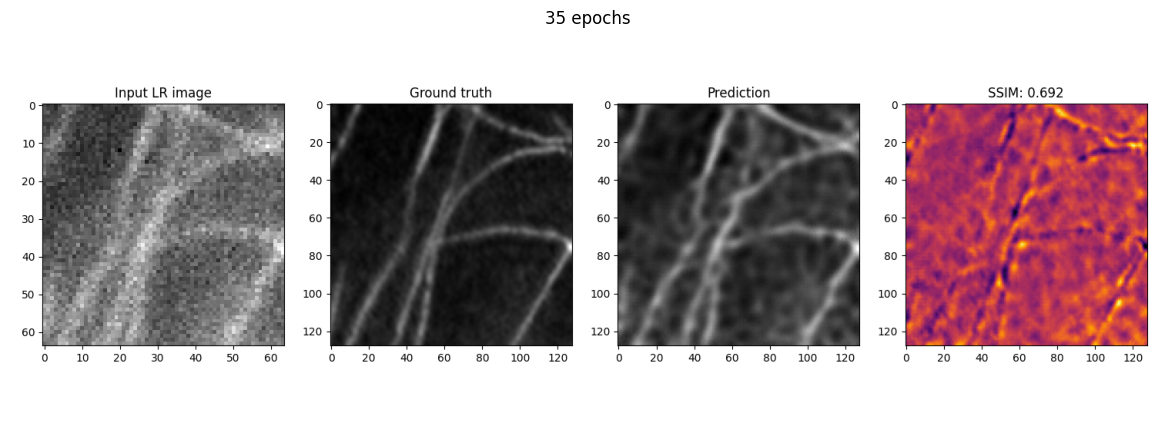

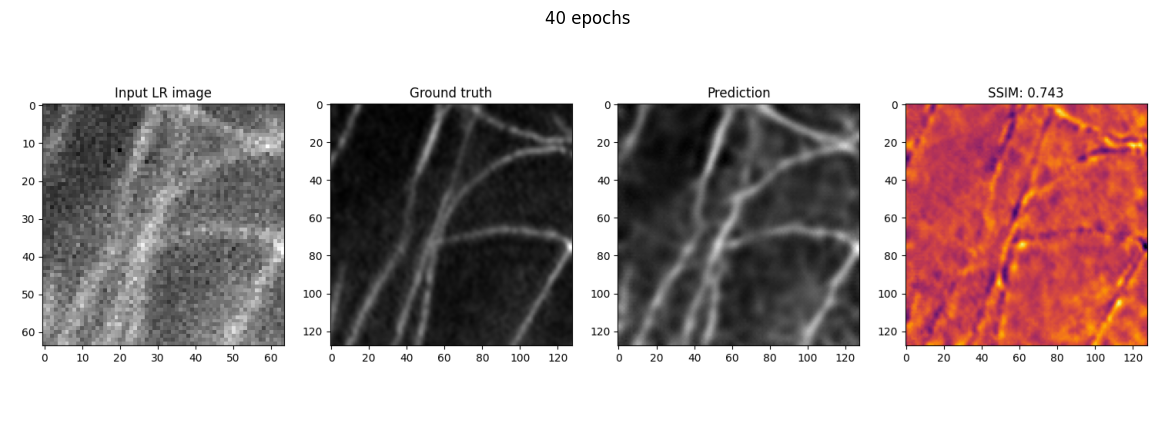

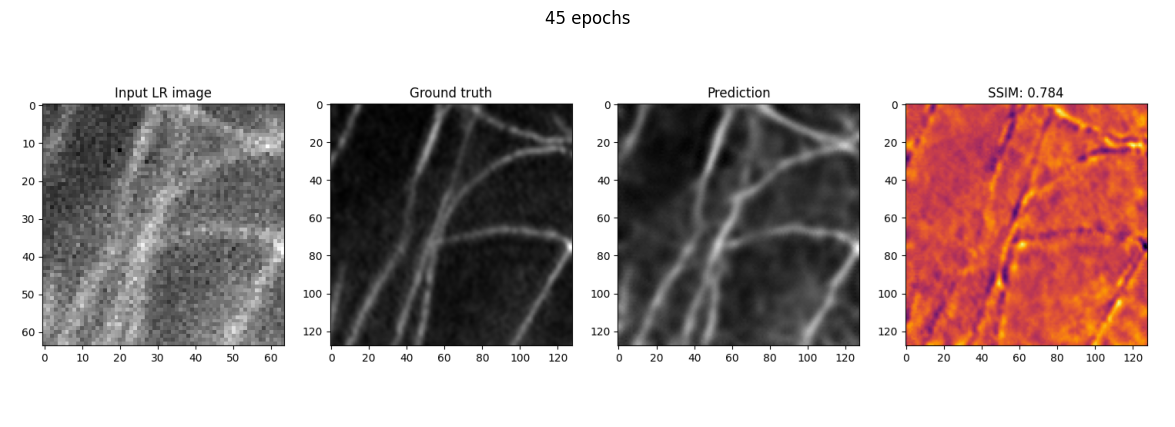

In [39]:
for f in sorted_imgs_by_epoch(os.listdir(train_images_path)):
    img_path = os.path.join(train_images_path, f)

    plt.figure(figsize=(15,5))
    plt.imshow(io.imread(img_path))
    plt.title(f[:-4] + ' epochs')
    plt.axis('off')
    plt.show()

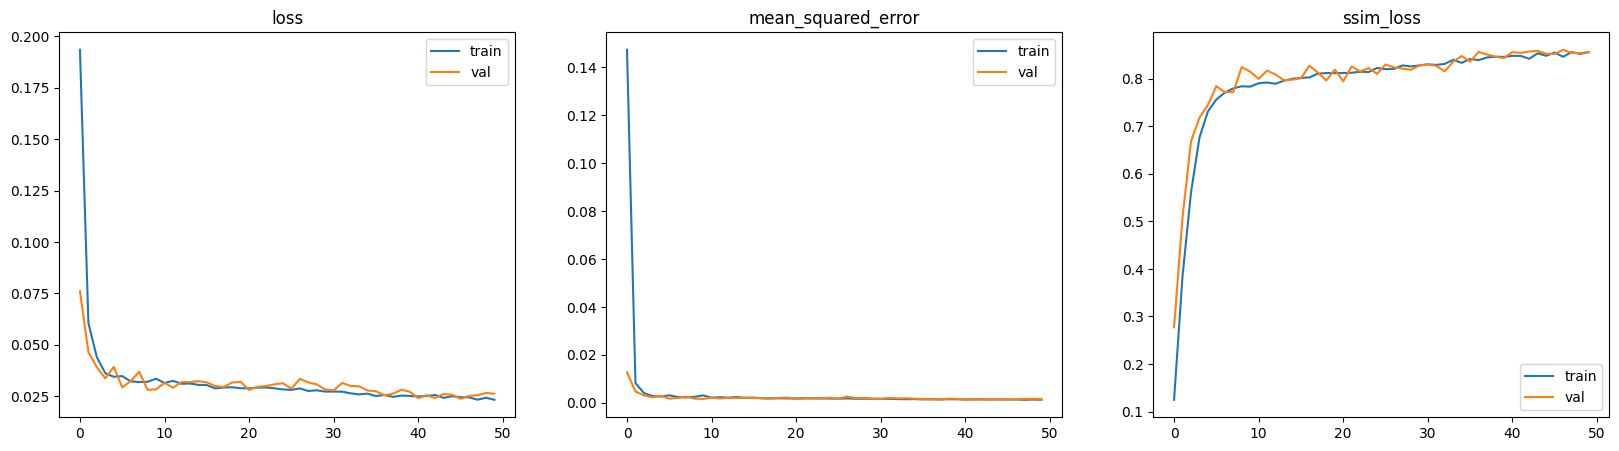

In [57]:
metric_list = ['loss', 'mean_squared_error', 'ssim_loss']

plt.figure(figsize=(20,5))
for i, metric in enumerate(metric_list):
    loss = np.load(os.path.join(train_metrics_path, f'{metric}.npy'))
    val_loss = np.load(os.path.join(train_metrics_path, f'val_{metric}.npy'))

    plt.subplot(1,len(metric_list), i+1)
    sns.lineplot(loss, label='train')
    sns.lineplot(val_loss, label='val')
    plt.title(metric)

plt.show()

### Visualization of the testing information

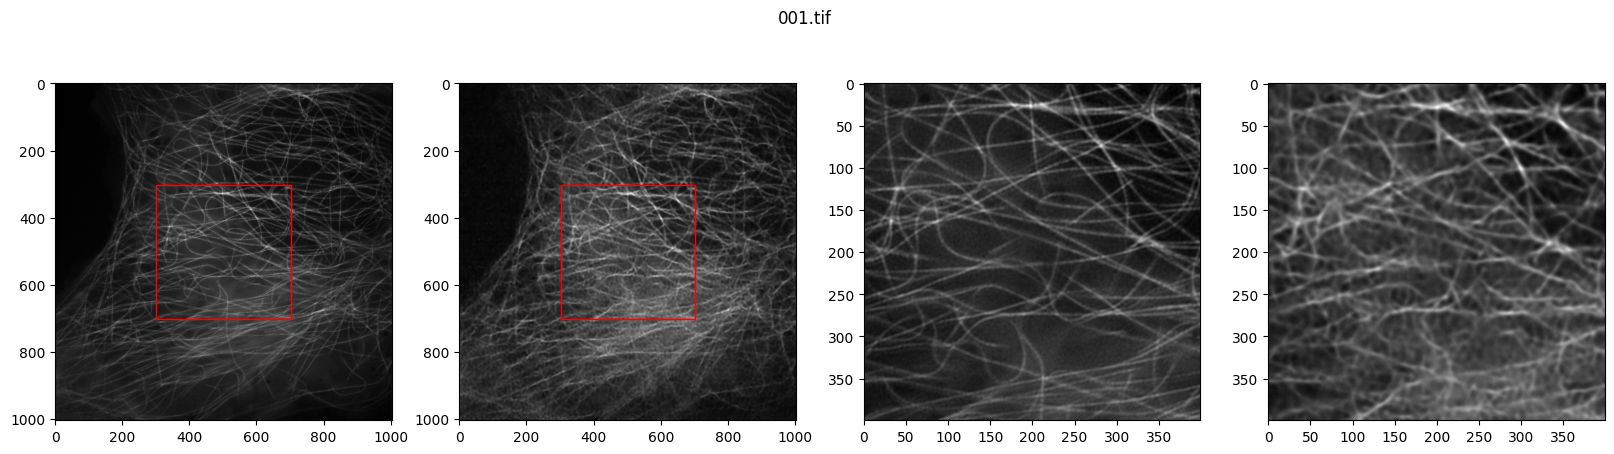

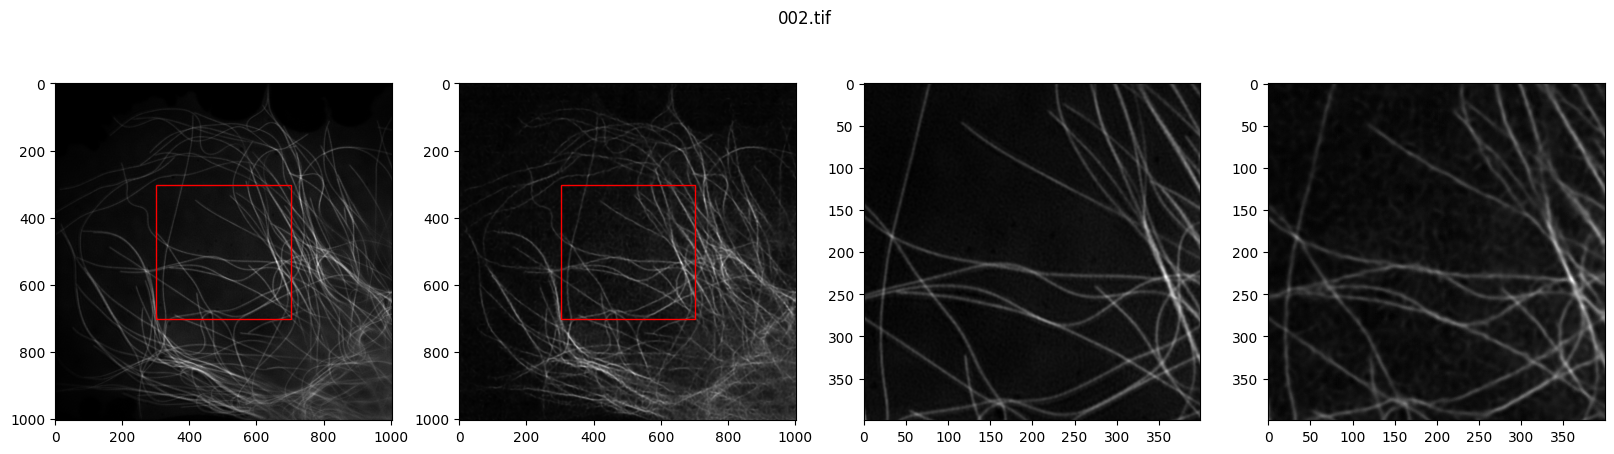

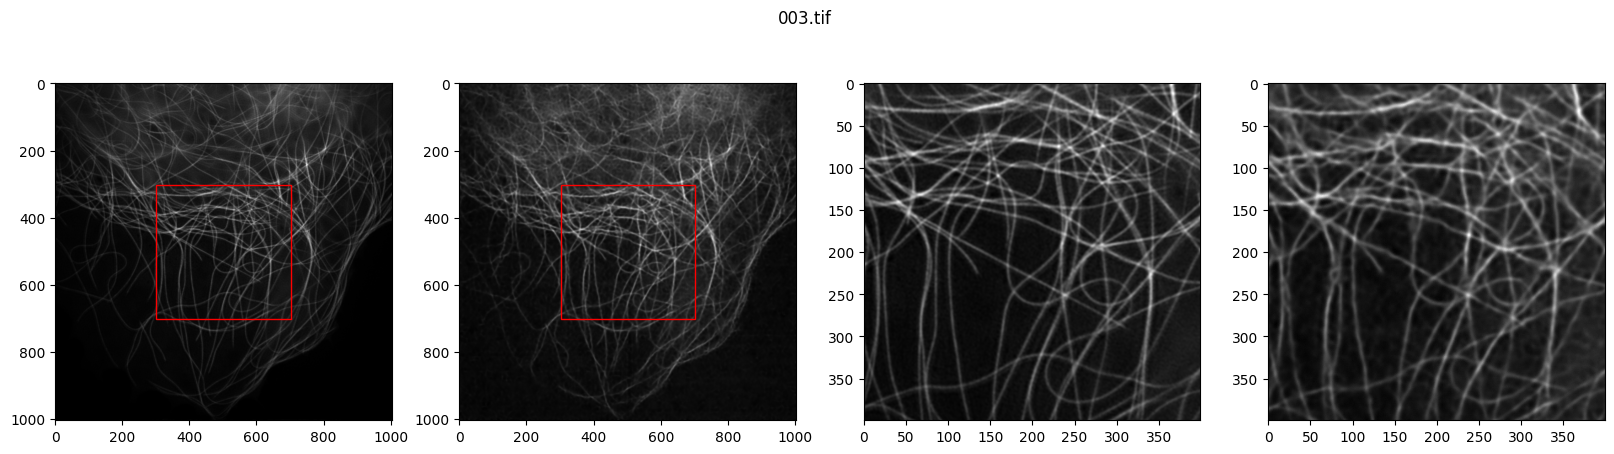

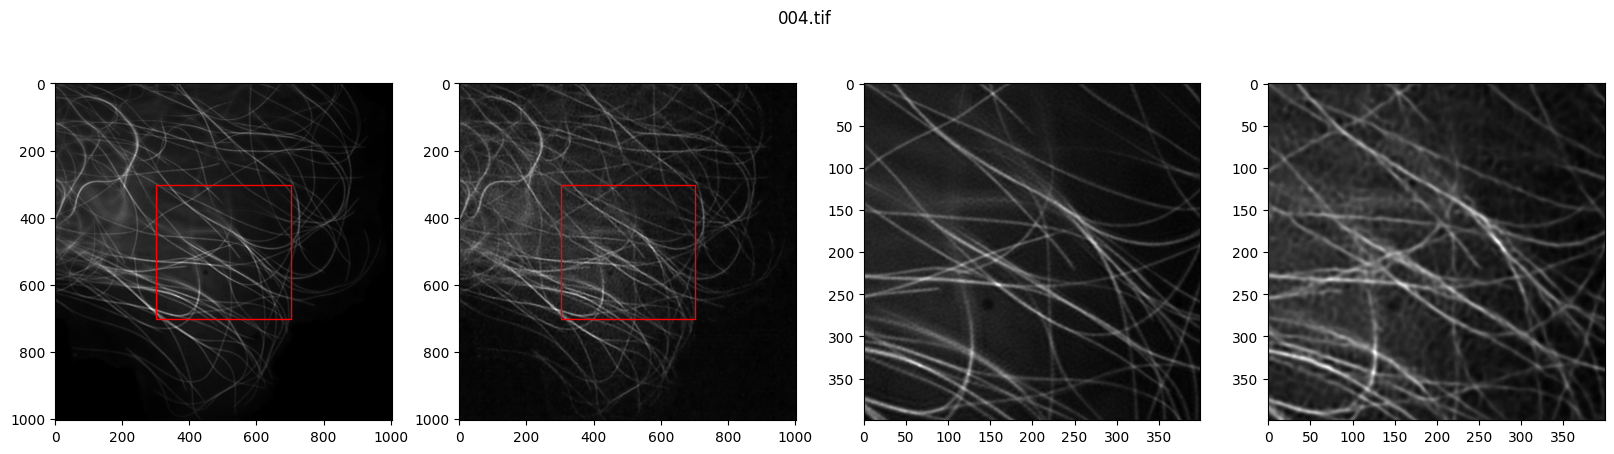

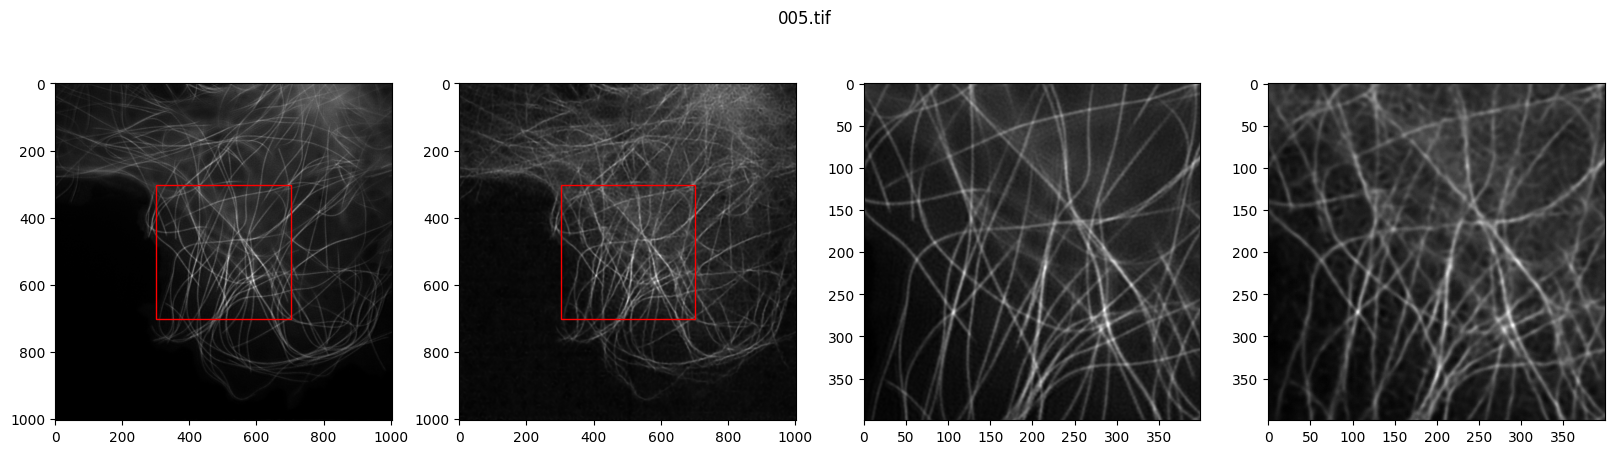

In [76]:
zoom_size = 200

dataset_config = load_yaml('./general_configs/dataset_configuration_placebo.yaml')
dataset_root = 'datasets' if os.path.exists('datasets') else '../datasets'
dataset_name = config_df['dataset_name']
train_lr, train_hr, val_lr, val_hr, test_lr, test_hr = dataset_config[dataset_name]['data_paths']
test_lr_path = os.path.join(dataset_root, dataset_name, test_lr) if test_lr is not None else None
test_hr_path = os.path.join(dataset_root, dataset_name, test_hr) if test_hr is not None else None

for f in sorted(os.listdir(predicted_images_path))[:5]:
    img_path = os.path.join(predicted_images_path, f)
    gt_img_path = os.path.join(test_hr_path, f)

    img = io.imread(img_path)
    gt_img = io.imread(gt_img_path)

    plt.figure(figsize=(20,5))
    plt.subplot(1,4,1)
    plt.imshow(gt_img, 'gray')
    ax = plt.gca()
    ax.add_patch(Rectangle(((gt_img.shape[0]//2)-zoom_size, (gt_img.shape[1]//2)-zoom_size),zoom_size*2,zoom_size*2,
                            linewidth=1,edgecolor='r',facecolor='none'))
    plt.subplot(1,4,2)
    plt.imshow(img, 'gray')
    ax = plt.gca()
    ax.add_patch(Rectangle(((img.shape[0]//2)-zoom_size, (img.shape[1]//2)-zoom_size),zoom_size*2,zoom_size*2,
                            linewidth=1,edgecolor='r',facecolor='none'))
    plt.subplot(1,4,3)
    plt.imshow(gt_img[(gt_img.shape[0]//2)-zoom_size:(gt_img.shape[0]//2)+zoom_size,
                      (gt_img.shape[1]//2)-zoom_size:(gt_img.shape[1]//2)+zoom_size], 'gray')
    plt.subplot(1,4,4)
    plt.imshow(img[(img.shape[0]//2)-zoom_size:(img.shape[0]//2)+zoom_size,
                   (img.shape[1]//2)-zoom_size:(img.shape[1]//2)+zoom_size], 'gray')
    plt.suptitle(f)
    plt.show()

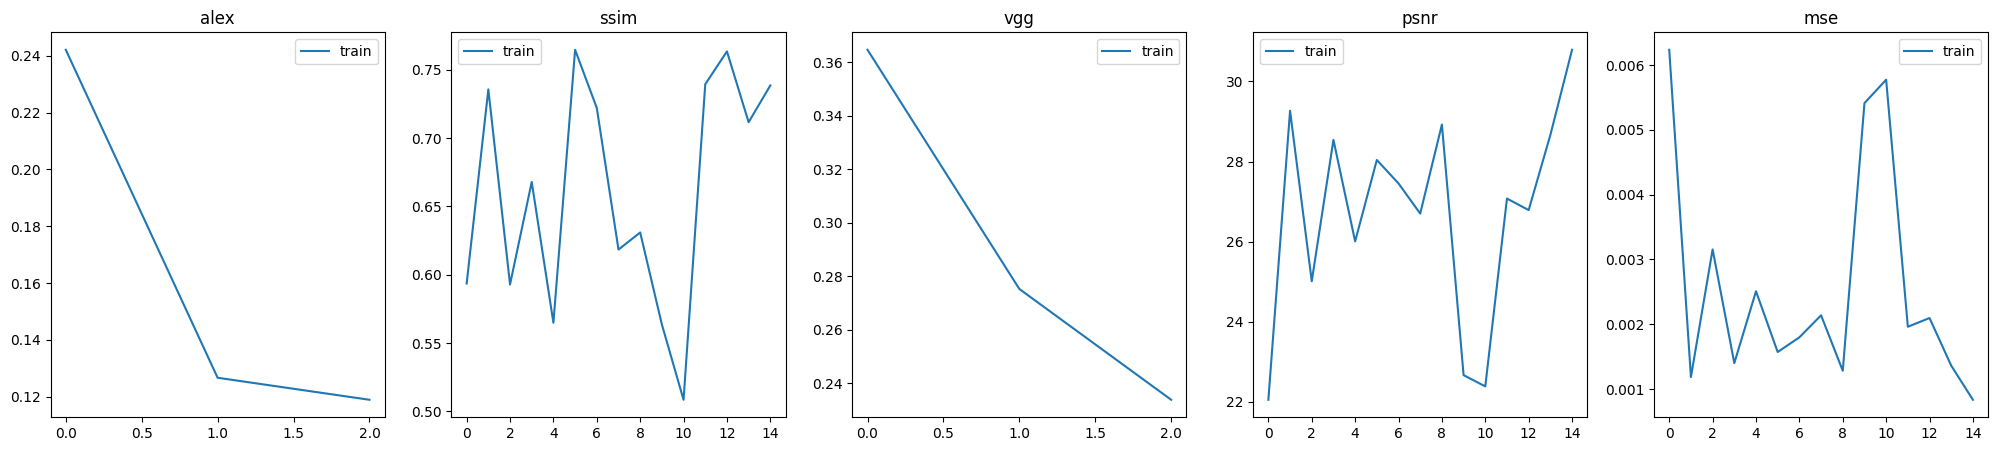

In [80]:
metric_list = [e[:-4] for e in os.listdir(test_metrics_path)]

plt.figure(figsize=(5*len(metric_list),5))
for i, metric in enumerate(metric_list):
    loss = np.load(os.path.join(test_metrics_path, f'{metric}.npy'))

    plt.subplot(1,len(metric_list), i+1)
    sns.lineplot(loss, label='train')
    plt.title(metric)

plt.show()

# Analyze a group of configurations